<a href="https://colab.research.google.com/github/ernestohp/TecnicasIA/blob/main/DesicionTree4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load libraries
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [2]:
url = "https://raw.githubusercontent.com/ernestohp/TecnicasIA/main/dataset_61_iris.csv"
ds = pd.read_csv(url)
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
array = ds.values
X = array[:,0:4]
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)

In [5]:
print(X_validation.shape, Y_validation.shape, X_train.shape, Y_train.shape)

(30, 4) (30,) (120, 4) (120,)


In [7]:
# Realizamos predicciones con el dataset de validación
model = DecisionTreeClassifier()
model.fit(X_train , Y_train)
predictions = model.predict(X_validation)

In [8]:
# Evaluamos las predicciones, en primer lugar la precisión obtenida
print(accuracy_score(Y_validation, predictions))

0.9666666666666667


In [9]:
print(confusion_matrix(Y_validation, predictions))

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


In [10]:
print(classification_report(Y_validation, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [11]:
# realizamos una predicción de ejemplo:
print(model.predict([[6.0, 3.0, 5.0, 2.0]]))

['Iris-virginica']


In [13]:
##VISUALIZACION DEL ARBOL
from sklearn import tree
import matplotlib.image as pltimg
import pydotplus

print(model)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


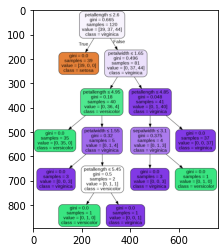

In [15]:
data = tree.export_graphviz(model, out_file=None, feature_names=ds.columns.values[0:4], 
                            class_names=["setosa", "versicolor", "virginica"], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisions.png')

img = pltimg.imread('mydecisions.png')
imgplot = plt.imshow(img)
plt.show()